In [1]:
import pandas
from compare_temperatures.plot_temperatures import read_adafruit_feed_csv

In [2]:
yesterday = '2022-08-23'

In [3]:
bme280 = read_adafruit_feed_csv('data/bme280-temp-20220824-0701.csv', 'bme280', yesterday)
tmp36 = read_adafruit_feed_csv('data/temp-tmp36-20220824-0659.csv', 'tmp36', yesterday)

In [4]:
bme280

,bme280
created,
2022-08-23 07:35:00+00:00,23.13
2022-08-23 07:36:00+00:00,22.27
2022-08-23 07:37:00+00:00,22.28
2022-08-23 07:38:00+00:00,22.39
2022-08-23 07:39:00+00:00,22.24
...,...
2022-08-24 06:56:00+00:00,20.94
2022-08-24 06:57:00+00:00,20.91
2022-08-24 06:58:00+00:00,20.99


In [5]:
tmp36

,tmp36
created,
2022-08-23 07:37:00+00:00,24.94300
2022-08-23 07:38:00+00:00,25.50698
2022-08-23 07:39:00+00:00,25.02358
2022-08-23 07:40:00+00:00,25.42642
2022-08-23 07:41:00+00:00,25.42642
...,...
2022-08-24 06:54:00+00:00,24.21790
2022-08-24 06:55:00+00:00,23.97620
2022-08-24 06:56:00+00:00,24.21790


In [8]:
merged_temps = pandas.merge(tmp36, bme280, left_index=True, right_index=True)
merged_temps

,tmp36,bme280
created,,
2022-08-23 07:37:00+00:00,24.94300,22.28
2022-08-23 07:38:00+00:00,25.50698,22.39
2022-08-23 07:39:00+00:00,25.02358,22.24
2022-08-23 07:40:00+00:00,25.42642,22.20
2022-08-23 07:41:00+00:00,25.42642,22.01
...,...,...
2022-08-24 06:54:00+00:00,24.21790,20.95
2022-08-24 06:55:00+00:00,23.97620,20.98
2022-08-24 06:56:00+00:00,24.21790,20.94


In [9]:
merged_temps['difference'] = merged_temps['tmp36'] - merged_temps['bme280']

In [10]:
merged_temps

,tmp36,bme280,difference
created,,,
2022-08-23 07:37:00+00:00,24.94300,22.28,2.66300
2022-08-23 07:38:00+00:00,25.50698,22.39,3.11698
2022-08-23 07:39:00+00:00,25.02358,22.24,2.78358
2022-08-23 07:40:00+00:00,25.42642,22.20,3.22642
2022-08-23 07:41:00+00:00,25.42642,22.01,3.41642
...,...,...,...
2022-08-24 06:54:00+00:00,24.21790,20.95,3.26790
2022-08-24 06:55:00+00:00,23.97620,20.98,2.99620
2022-08-24 06:56:00+00:00,24.21790,20.94,3.27790


In [11]:
merged_temps['tmp36'].corr(merged_temps['bme280'])

0.992126011927515

<AxesSubplot:xlabel='created'>

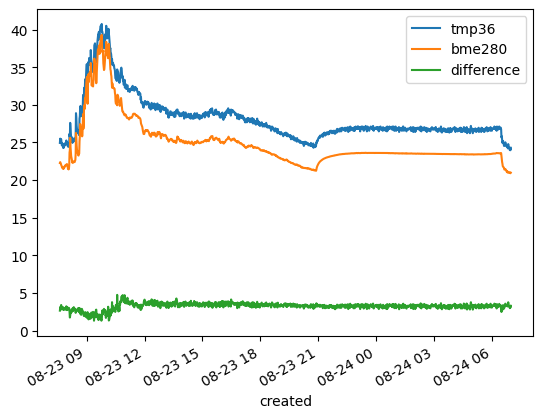

In [12]:
merged_temps.plot()